In [1]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.4f}'.format

In [2]:
난수개수 = 100000
변수개수 = 10
values = np.random.random((난수개수, 변수개수))  # 0~1 범위, index : 문자
df = pd.DataFrame(values)
df

,0,1,2,3,4,5,6,7,8,9
0,0.5382,0.6947,0.1898,0.6173,0.8298,0.8424,0.3576,0.7894,0.4898,0.4602
1,0.8578,0.5751,0.0909,0.6133,0.6285,0.9817,0.8788,0.2398,0.6190,0.3643
2,0.8134,0.6333,0.4856,0.7573,0.5707,0.2500,0.9234,0.8299,0.2861,0.5930
3,0.9596,0.3322,0.6423,0.2492,0.4790,0.6574,0.8453,0.0820,0.5854,0.9296
4,0.1205,0.1734,0.4900,0.7618,0.6900,0.9107,0.1633,0.8376,0.1287,0.6238
...,...,...,...,...,...,...,...,...,...,...
99995,0.7393,0.3090,0.1881,0.2612,0.2944,0.2271,0.3275,0.5851,0.7850,0.2216
99996,0.8826,0.8177,0.4182,0.8612,0.3745,0.8384,0.3970,0.9727,0.5361,0.7753
99997,0.7509,0.0895,0.8906,0.2498,0.2731,0.0892,0.5515,0.9588,0.6833,0.3072
99998,0.5289,0.6179,0.1070,0.7573,0.4320,0.4944,0.3276,0.1900,0.4665,0.2001


In [3]:
df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A       100000 non-null  float64
 1   B       100000 non-null  float64
 2   C       100000 non-null  float64
 3   D       100000 non-null  float64
 4   E       100000 non-null  float64
 5   F       100000 non-null  float64
 6   G       100000 non-null  float64
 7   H       100000 non-null  float64
 8   I       100000 non-null  float64
 9   J       100000 non-null  float64
dtypes: float64(10)
memory usage: 7.6 MB


In [4]:
test = df.head(n = 10)

In [5]:
test

,A,B,C,D,E,F,G,H,I,J
0,0.5382,0.6947,0.1898,0.6173,0.8298,0.8424,0.3576,0.7894,0.4898,0.4602
1,0.8578,0.5751,0.0909,0.6133,0.6285,0.9817,0.8788,0.2398,0.6190,0.3643
2,0.8134,0.6333,0.4856,0.7573,0.5707,0.2500,0.9234,0.8299,0.2861,0.5930
3,0.9596,0.3322,0.6423,0.2492,0.4790,0.6574,0.8453,0.0820,0.5854,0.9296
4,0.1205,0.1734,0.4900,0.7618,0.6900,0.9107,0.1633,0.8376,0.1287,0.6238
5,0.7046,0.4912,0.5521,0.2102,0.3128,0.8583,0.4541,0.9832,0.4566,0.1106
6,0.0088,0.5588,0.8649,0.2575,0.3282,0.1406,0.1197,0.9447,0.4408,0.5417
7,0.6332,0.4989,0.2424,0.7609,0.0105,0.1355,0.7137,0.4420,0.0660,0.4706
8,0.1904,0.4579,0.1018,0.0985,0.3261,0.5426,0.3753,0.9638,0.6655,0.5477
9,0.6607,0.3543,0.4368,0.4015,0.6747,0.3003,0.6972,0.1671,0.3389,0.8709


## 작업속도 비교

In [6]:
df_result = pd.DataFrame(columns = ['read', 'write'])
df_result.head()

,read,write


In [1]:
!pip install openpyxl
# import 할 필요 없음

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------------------- 250.0/250.0 kB 7.5 MB/s eta 0:00:00


In [ ]:
# excel - 오래걸림!
tm = %timeit -o df.to_excel('test_data.xlsx')
df_result.loc['excel', 'write'] = tm.best
tm = %timeit -o df = pd.read_excel('test_data.xlsx')
df_result.loc['excel', 'read'] = tm.best

In [7]:
tm = %timeit -o df.to_csv('test_data.csv')    # 시간
df_result.loc['csv', 'write'] = tm.best       # 가장 빠른 시간 저장
tm = %timeit -o df = pd.read_csv('test_data.csv')
df_result.loc['csv', 'read'] = tm.best

1.28 s ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
183 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
tm = %timeit -o df.to_pickle('test_data.pickle')
df_result.loc['pickle', 'write'] = tm.best
tm = %timeit -o df = pd.read_pickle('test_data.pickle')
df_result.loc['pickle', 'read'] = tm.best

2.67 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.83 ms ± 700 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
tm = %timeit -o df.to_feather('test_data.ftr')
df_result.loc['feather', 'write'] = tm.best
tm = %timeit -o df = pd.read_feather('test_data.ftr')
df_result.loc['feather', 'read'] = tm.best

10.3 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.95 ms ± 75 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
tm = %timeit -o df.to_parquet('test_data.parquet')
df_result.loc['parquet', 'write'] = tm.best
tm = %timeit -o df = pd.read_parquet('test_data.parquet')
df_result.loc['parquet', 'read'] = tm.best

80.1 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.6 ms ± 97.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## spark 

In [11]:
df_result

,read,write
csv,0.1812,1.2357
pickle,0.0031,0.0026
feather,0.0068,0.0091
parquet,0.0105,0.0779


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20

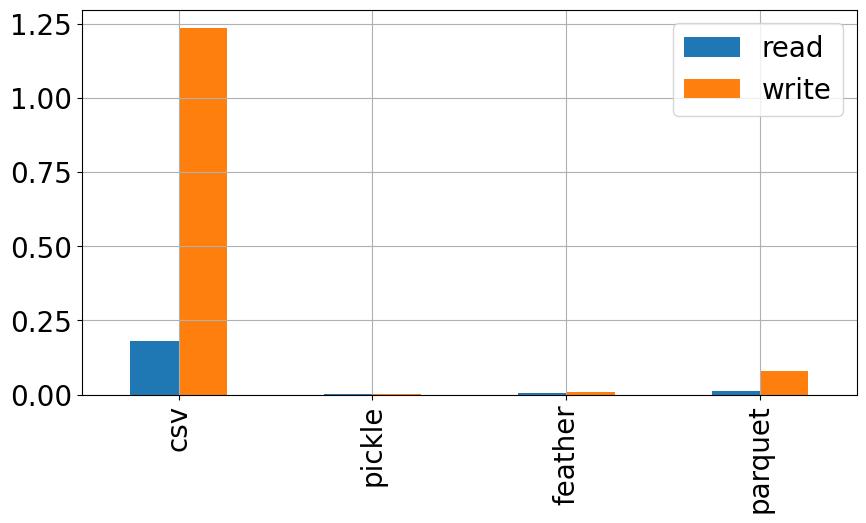

In [13]:
df_result
df_result.plot(kind = 'bar')
plt.show()